## World Happiness Report
Author: Jackie Zuker
Date: April 9, 2017

### Plot one variable four different ways: 


First we see a general histogram with a best-fit line. 

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

worldhappiness = pd.read_csv("/Users/jacquelynzuker/Desktop/WorldHappiness/2016.csv")
df = pd.DataFrame(worldhappiness)

%matplotlib inline




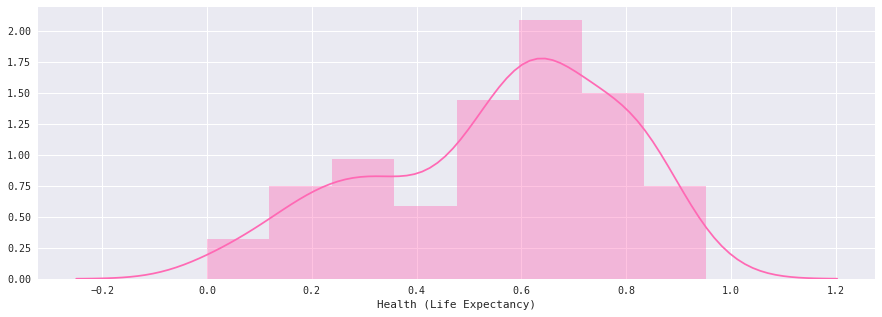

In [102]:
plt.figure(figsize=(15,5))
sns.distplot(df["Health (Life Expectancy)"], color = "hotpink", kde=True, rug=False);
plt.show()           


Next we have the histogram hidden, leaving only the shaded best-fit line. 

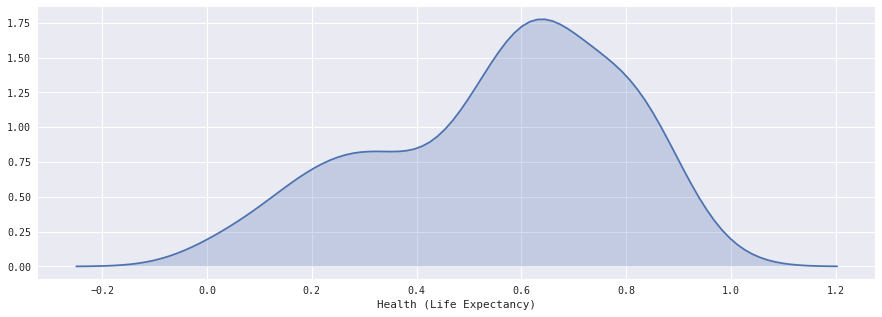

In [103]:
plt.figure(figsize=(15,5))
sns.distplot(df["Health (Life Expectancy)"], hist=False, kde_kws={"shade": True}, rug=False);
plt.show()           


Here is the histogram with the number of bins modified and the floor shown, so that the user can see the actual distribution. This might be useful when dealing with continuous variables vs integers, or when the bins are large. 

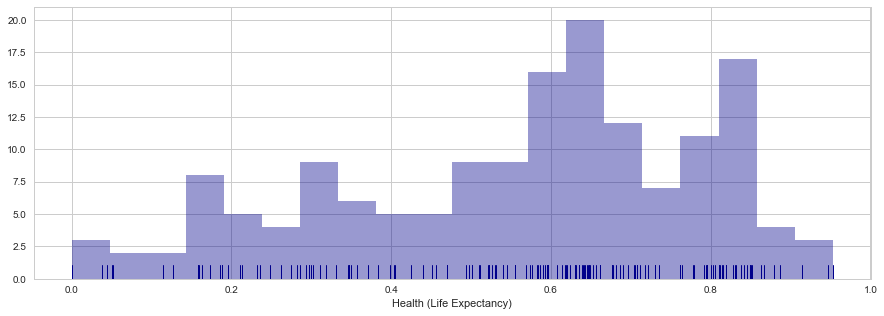

In [117]:
plt.figure(figsize=(15,5))
sns.distplot(df["Health (Life Expectancy)"], bins = 20, color = "darkblue", kde=False, 
             rug = True);
plt.show()           


Best fit line with the floor. This is somewhat redundant information. 

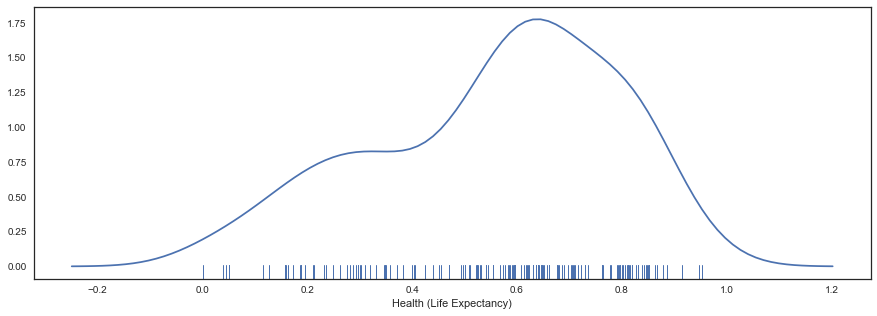

In [30]:
sns.set(style="white")
plt.figure(figsize=(15,5))
sns.distplot(df["Health (Life Expectancy)"], hist=False, kde=True, rug=True);
plt.show()           


### Plot two continuous variables three different ways: 

This first plot is quite useful, it seems that there is some correlation between the two variables. A best-fit line is helpful in seeing the relationship. 

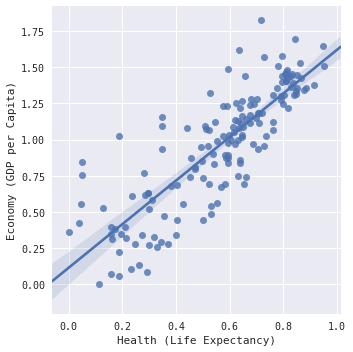

In [105]:
plt.figure(figsize=(20,7))
sns.lmplot(x="Health (Life Expectancy)", y="Economy (GDP per Capita)", data=worldhappiness)
plt.show()

This jointplot captures some of the best features of two separate histograms and an lmplot. The disadvantage is that not everyone knows how to read them, so it may be confusing to the reader. 

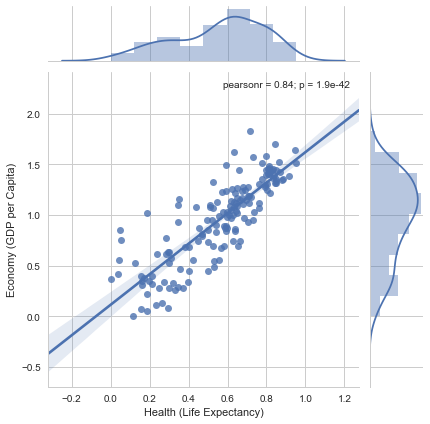

In [116]:
sns.jointplot(x="Health (Life Expectancy)", y="Economy (GDP per Capita)", data=worldhappiness,
              kind="reg");

This divides the scatter plot into bins, allowing one to potentially view clusters within the data. A disadvantage is that it may oversimpify the data by making it seem more "binned" than continuous when it shouldn't be. 

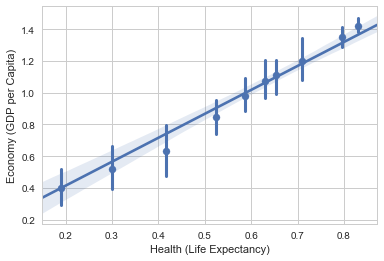

In [115]:
sns.regplot(x=df["Health (Life Expectancy)"], y=df["Economy (GDP per Capita)"], x_bins=10, 
            marker='o')
plt.show()

### Pick one categorical variable and one continuous variable, and plot them six different ways: 

Here we view the relationships of Health within each continental region. The ***boxplot*** allows us to see median values, interquartile ranges, and outliers. However, boxplots don't allow us to see the finer details of the distribution of the data.  

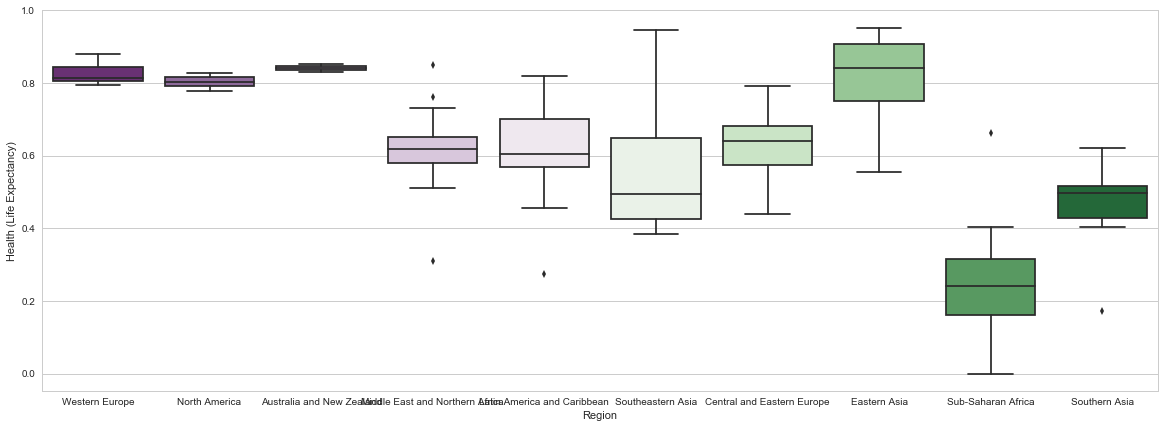

In [107]:
plt.figure(figsize=(20,7))
sns.set_style("whitegrid")
sns.despine(left=False)

sns.boxplot("Region","Health (Life Expectancy)", data=worldhappiness, palette="PRGn")
plt.show()

***Swarm plots*** allow us to see the finer distribution within the data, but it can be more difficult to decipher where the median and interquartile values are. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

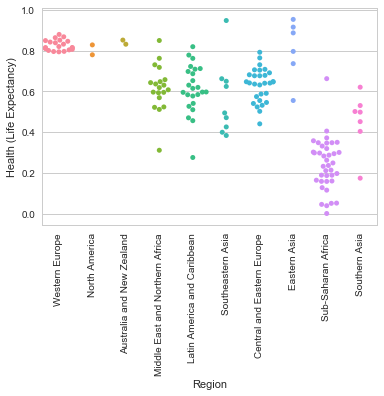

In [111]:
sns.swarmplot(x="Region", y="Health (Life Expectancy)", data=worldhappiness)
plt.xticks(rotation="vertical")

The ***lmplot*** can be useful in many circumstances - it allows the data and the best-fit lines within the data to be viewed. However, in this setting with so many *Regions* to display, the effect is a lot of chaos. 

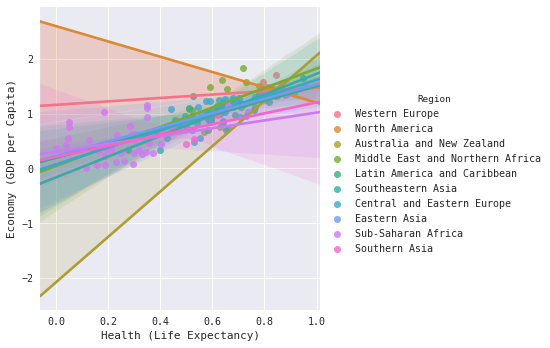

In [119]:
sns.lmplot(
    x="Health (Life Expectancy)", y="Economy (GDP per Capita)", data=worldhappiness, 
    hue="Region");



The ***FacetGrid*** allows each regions to be compared separately, but on the same scale of axes. We see here that the overall trends comparing the Economy and Health is generally positively correlated, but also that the range of values for each variable is not equally distributed within each *Region*. 

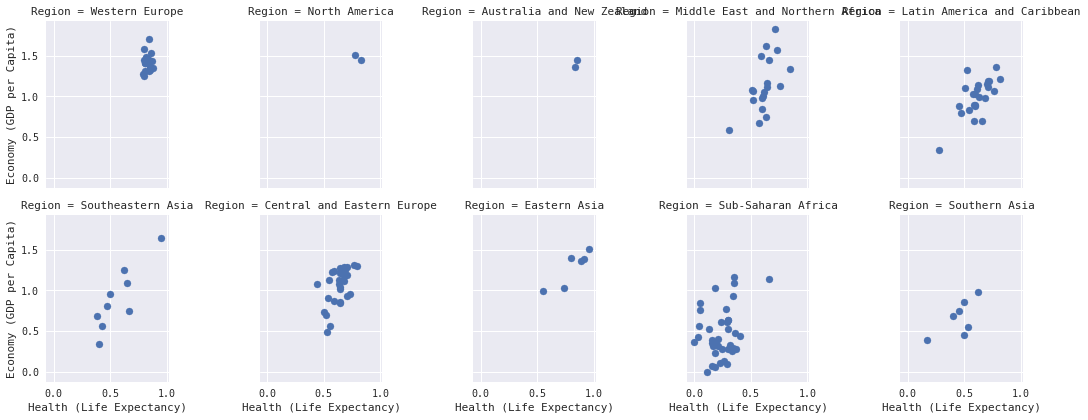

In [121]:
g = sns.FacetGrid(df, col="Region", col_wrap=5)
g.map(plt.scatter, "Health (Life Expectancy)", "Economy (GDP per Capita)")
plt.show()

The ***Violin Plot*** allows one to view the median and the general distribution trends within the data, but one cannot differentiate between outlier values and a large variance within the data. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

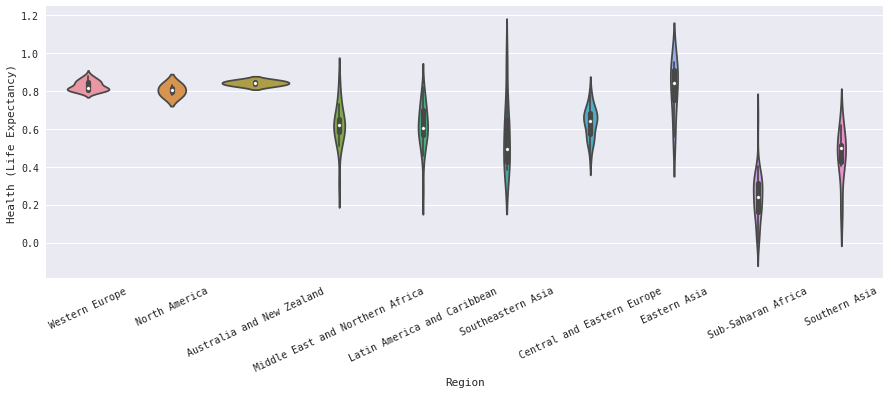

In [120]:
plt.figure(figsize=(15,5))
sns.violinplot("Region","Health (Life Expectancy)", data=worldhappiness)
plt.xticks(rotation=25)

The ***barplot*** is often preferred in presentations because the means can be easily compared. The data provided is very limited, but is easily accessible to large audiences, because of its readability even to an untrained eye. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

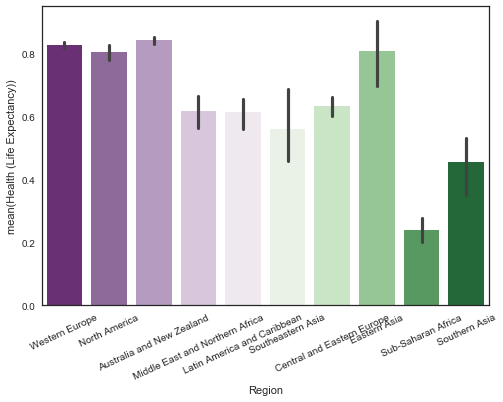

In [95]:
sns.barplot("Region","Health (Life Expectancy)", data=worldhappiness, palette="PRGn")
plt.xticks(rotation=25)

### Challenge

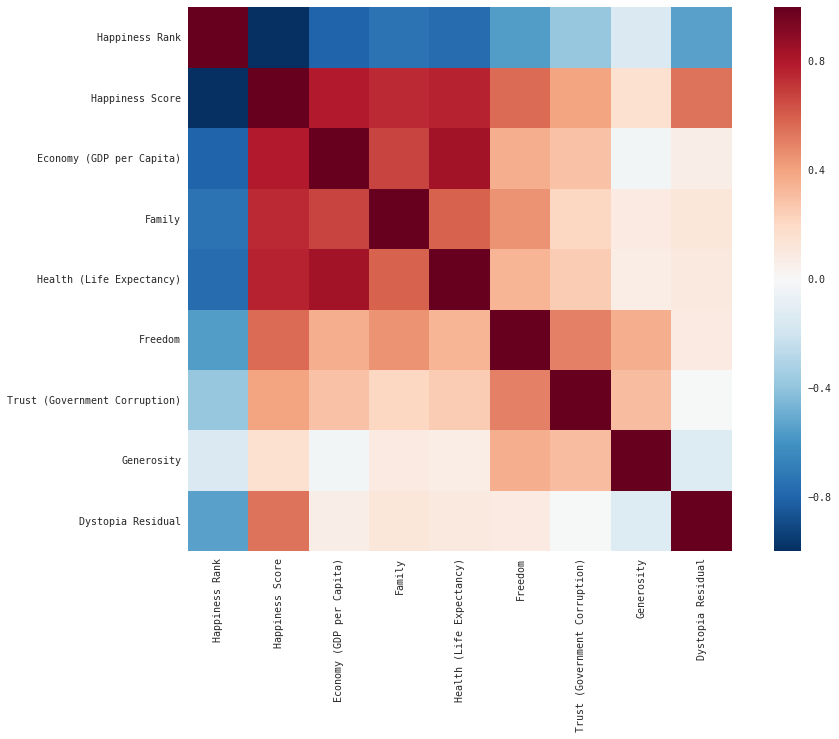

In [118]:
sns.set(context="notebook", font="monospace")

# Correlation matrix of numerical features
corrmat=worldhappiness[["Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", 
                        "Family", "Health (Life Expectancy)", "Freedom", 
                        "Trust (Government Corruption)", "Generosity", 
                        "Dystopia Residual"]].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Here we see a ***scatter plot matrix*** as several continuous variables are plotted against each other. We see the some variables are much more strongly correlated than others. We also see, as seen in the correlation matrix, that the Happiness Rank tends to be negatively correlated with several variables. 

The diagonal line is set to the default showing a histogram of each variable. 

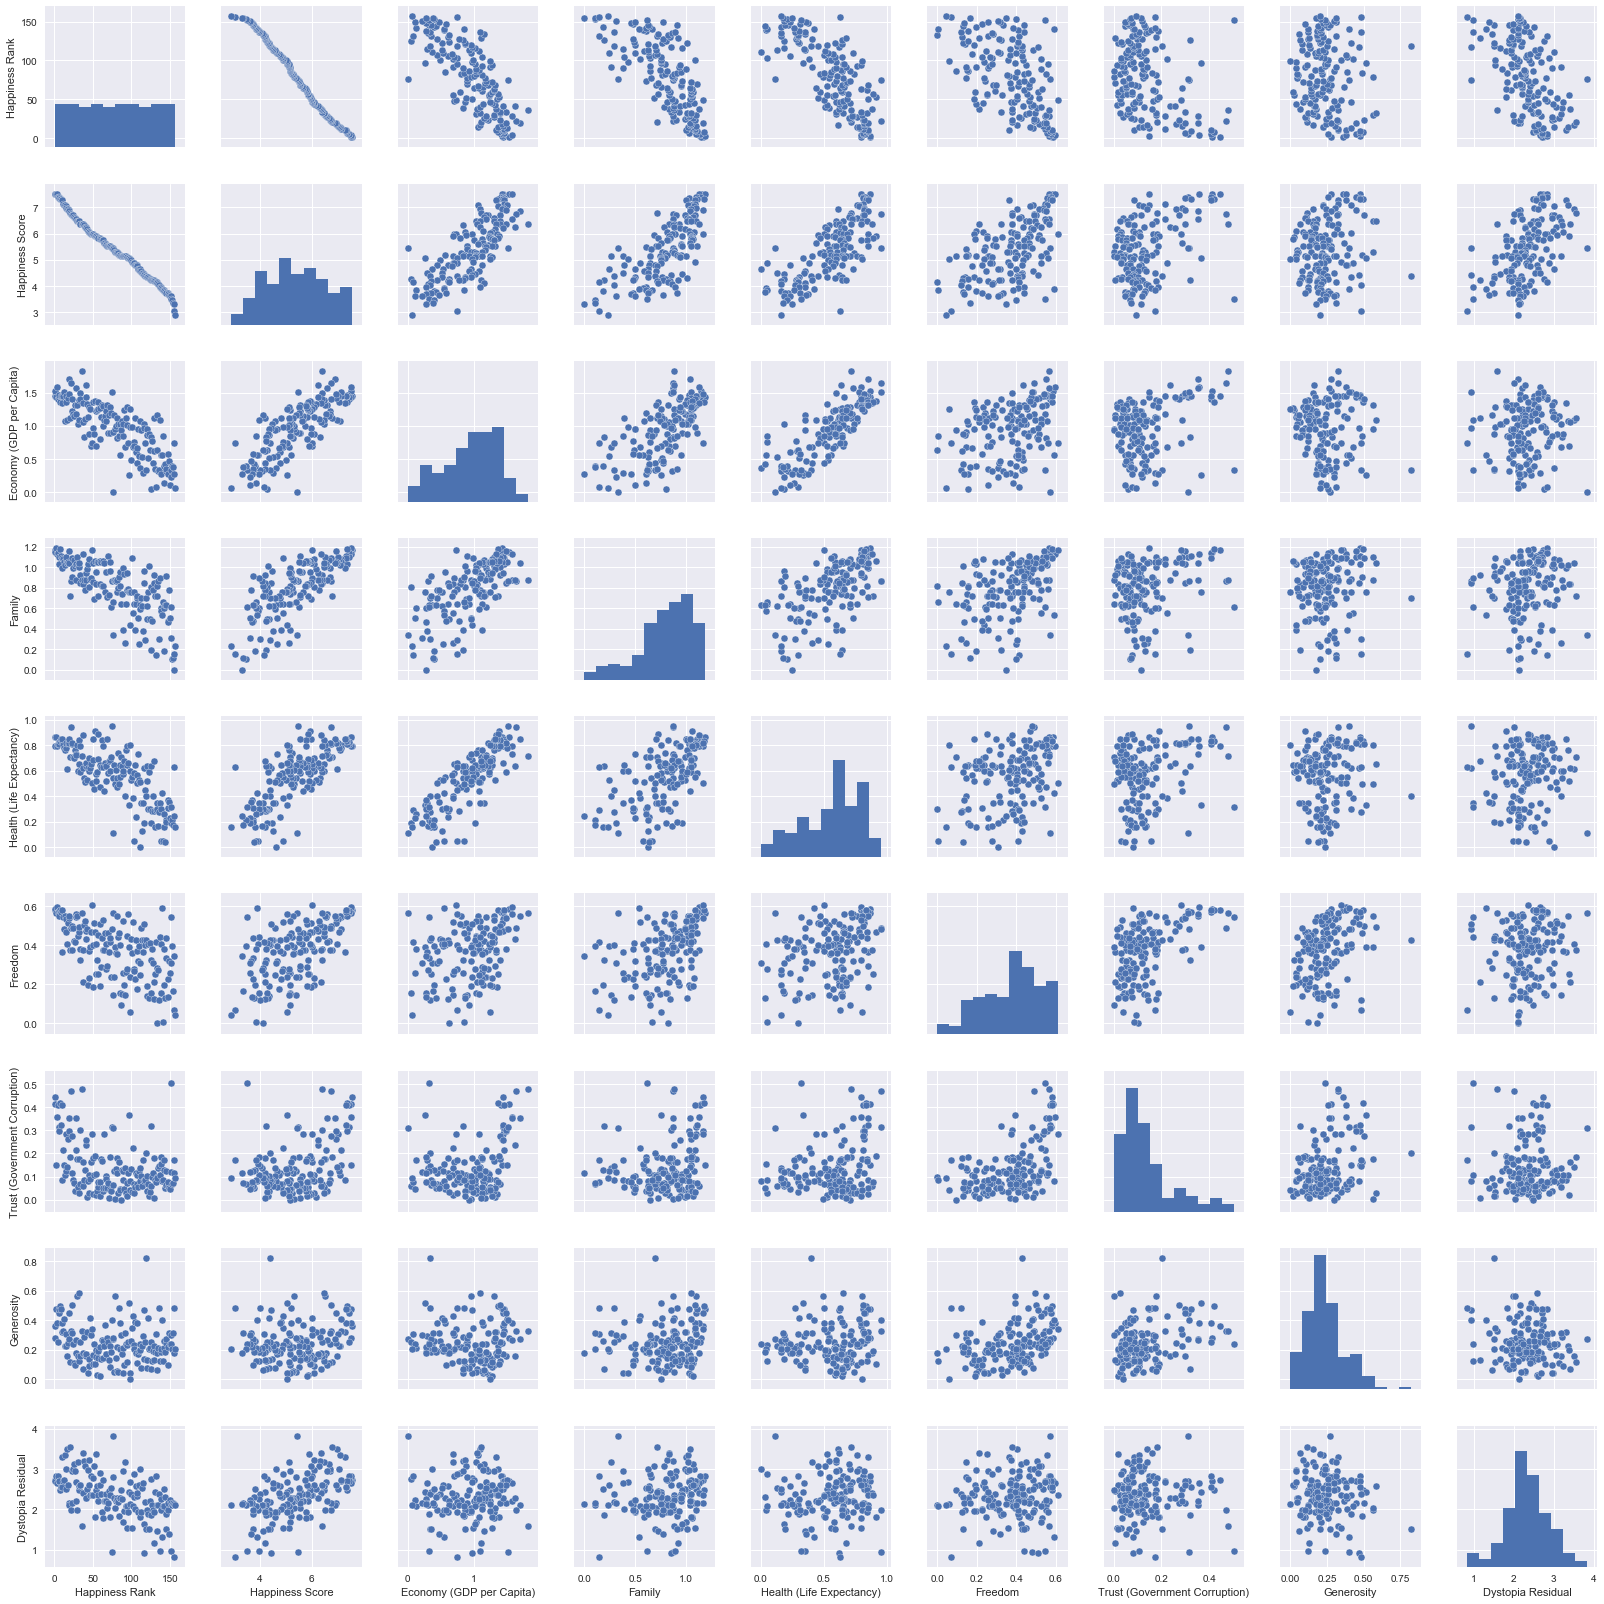

In [124]:
sns.set()
cols = ["Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", 
                        "Family", "Health (Life Expectancy)", "Freedom", 
                        "Trust (Government Corruption)", "Generosity", 
                        "Dystopia Residual"]
sns.pairplot(worldhappiness[cols])
plt.show();

This ***pair plot*** is comprised of *reg* plots, which have a best-fine line, allowing for overall trends to be more easily recognized. It ignores heteroskedasticity and does not test whether the model is actually linear or not, but it can be a good place to start when looking for overall trends.

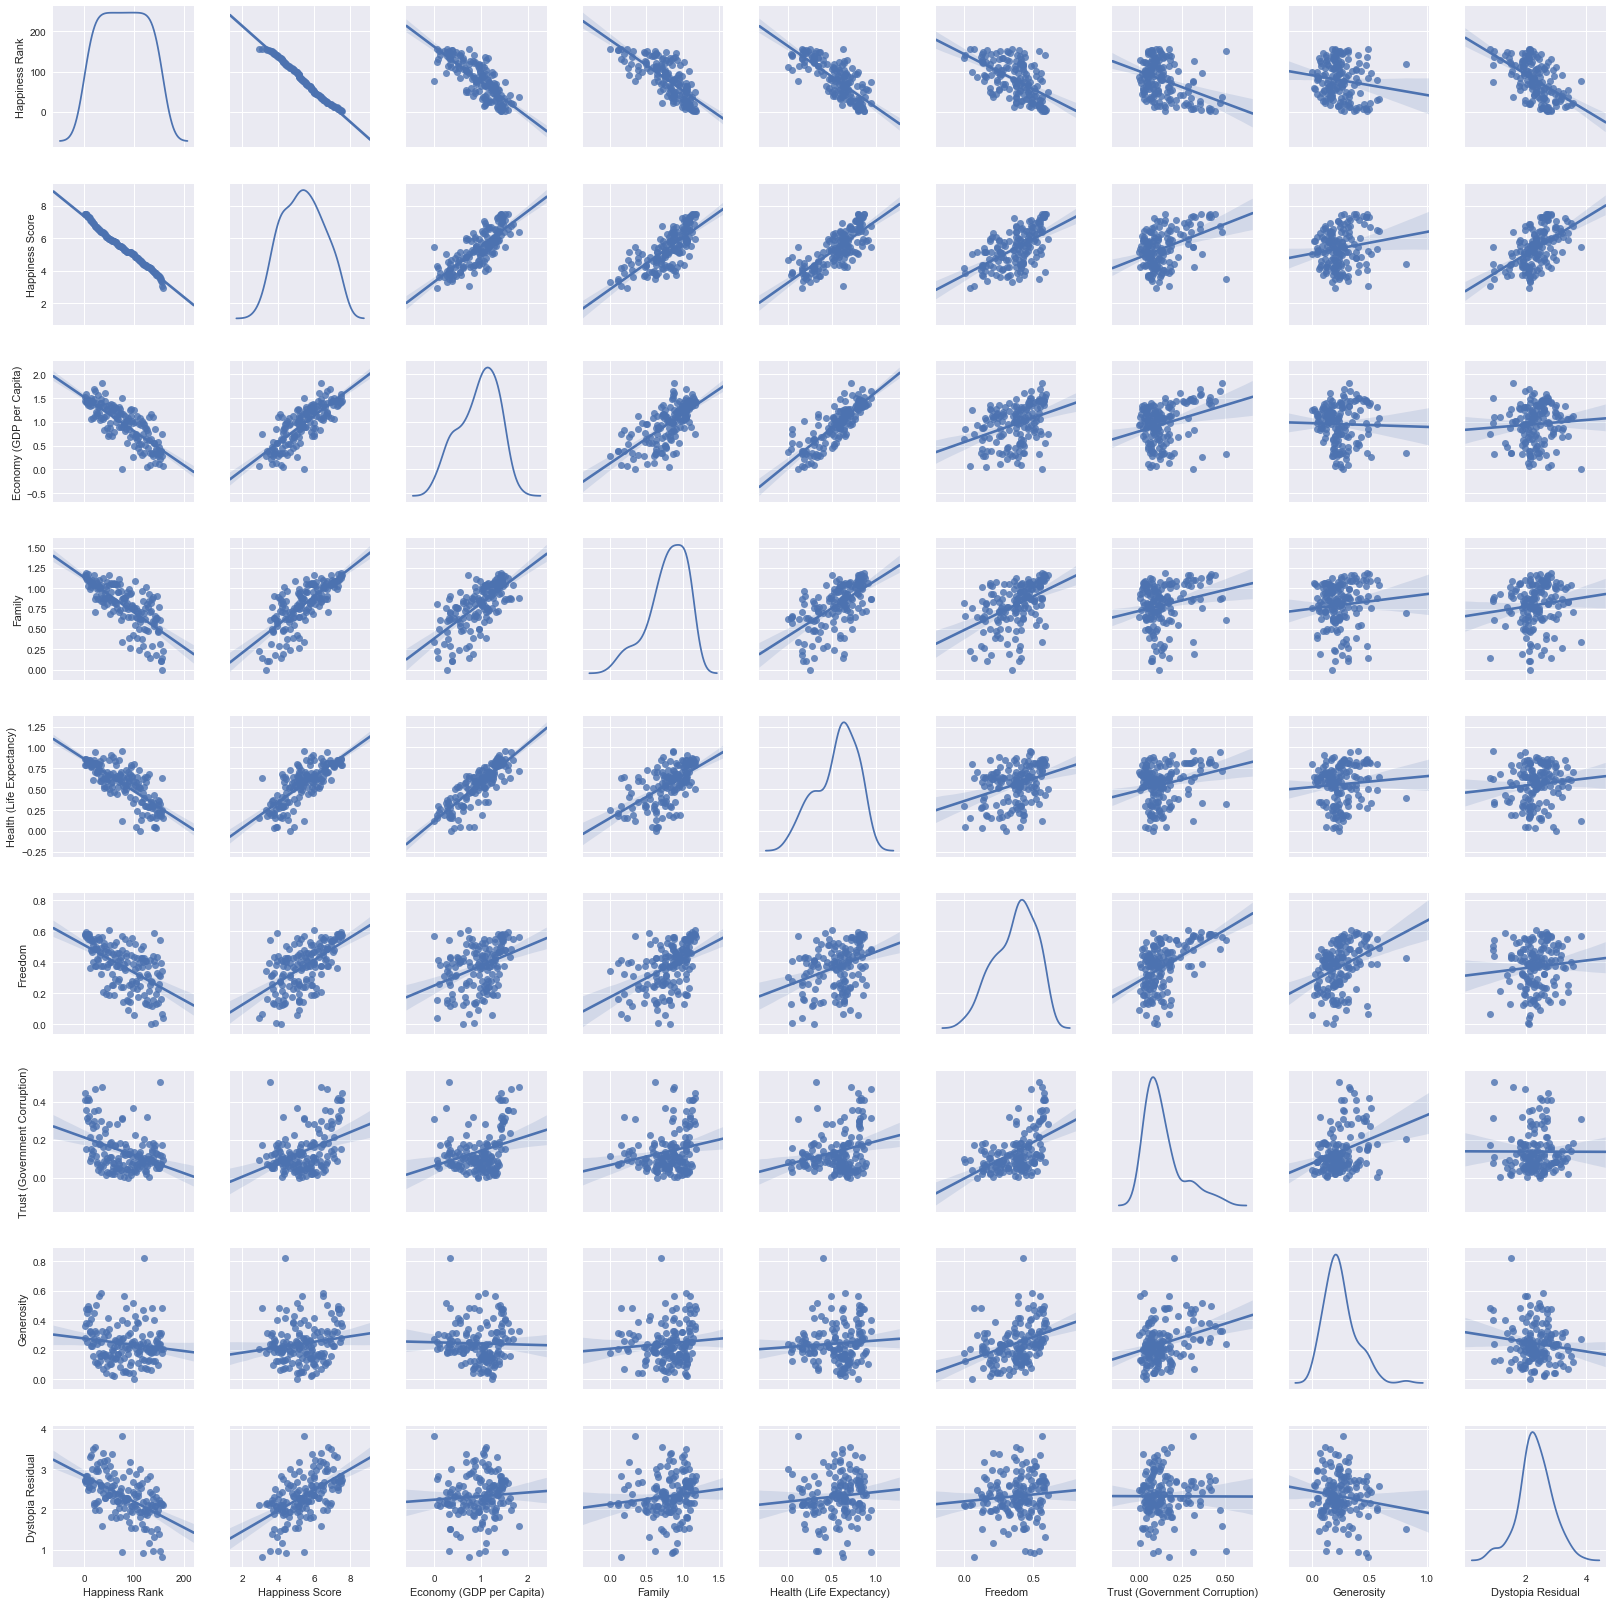

In [133]:
sns.set()
cols = ["Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", 
                        "Family", "Health (Life Expectancy)", "Freedom", 
                        "Trust (Government Corruption)", "Generosity", 
                        "Dystopia Residual"]
sns.pairplot(worldhappiness[cols], diag_kind="kde", kind="reg")
plt.show();